# Trade&Ahead


## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

### Importing necessary libraries

In [1]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Complete the code to import the data
data = pd.read_csv("stock_data.csv")

In [4]:
data.shape

(340, 15)

There are 340 rows and 15 columns in the dataset

In [5]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") 

There are 340 rows and 15 columns.


In [6]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [7]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Observations
- Ticker symbol, Security (Company name), GICS Sector and GICS Sub Industry are all of object data types. 
- The remaining variables are of numeric (float and integar) data types 
- There are variables that indicate strength of financial performance of the companies
- All variables have 340 non-null counts


In [8]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [9]:
# checking for duplicate values
df.duplicated().sum() # Getting total number of duplicate values

0

There are no duplicated entries in the dataset

In [10]:
# checking for missing values in the data
df.isna().sum() # Checking the missing values in the data

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There are no missing values in the data

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


### Observations
- There are 340 companies represented in 11 GICS Sectors and 104 GICS Sub Industries
- Industrials GICS Sector has the most entries with 53 values and Oil & Gas Exploration Sub Industry is the most represented with 16 entries
- Current Price has a minimum value of <span>&dollar;</span>4.5, maximum of approx <span>&dollar;</span>1275, mean value of <span>&dollar;</span>80.86 and median of <span>&dollar;</span>59.71. This variable will show skewness and outliers 
- Net Cash flow and Net Income have minimum negative values and maximum values of over 20 billion dollars. This shows a very wide disparity in the data and will be exhibited by outliers.
- Earnings Per Share has a minimum value of <span>&dollar;</span>-61.2, maximum value of <span>&dollar;</span>50.09, mean of <span>&dollar;</span>2.77, median of <span>&dollar;</span>2,85 and values up to the 75th percentile is <span>&dollar;</span>4.62. This distribution will also have lots of outliers
- P/B Ratio has a minimum of -76.12, mean of -1.72 and maximum value of 129.06

### Univariate analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

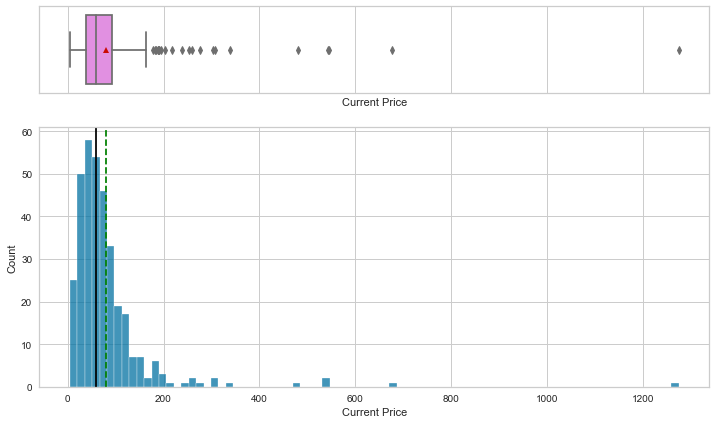

In [13]:
histogram_boxplot(df, 'Current Price') # Creating histogram_boxplot for 'Current Price'

- Current price shows a heavily right skewed distribution less than <span>&dollar;</span>5 and maximum value of over <span>&dollar;</span>1200   

- The distribution has lots of outliers

**`Price Change`**

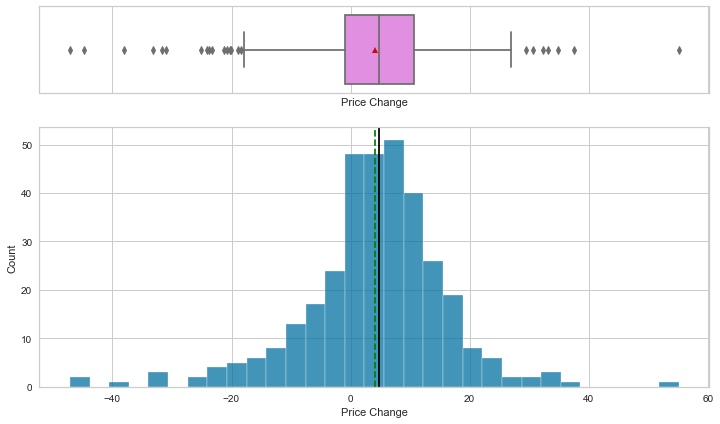

In [14]:
histogram_boxplot(df, 'Price Change')  # Creating histogram_boxplot for 'Price Change'

- This is a fairly normal distribution with outliers to the upper and lower ends
- The mean is close to the median at 4.1 and 4.8 respectively

**`Volatility`**

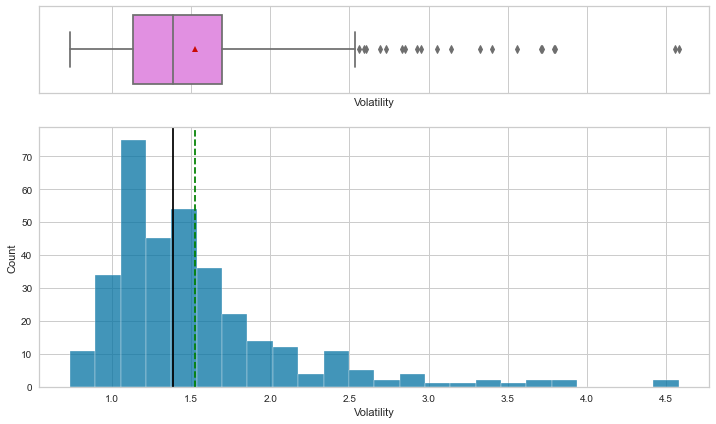

In [15]:
histogram_boxplot(df, 'Volatility')  # Creating histogram_boxplot for 'Volatility'

- Volatility distribution is a right skewed distribution with outliers at the right end of the distribution
- The mean and median are close at apporximately 1.5 and 1.4 respectively

**`ROE`**

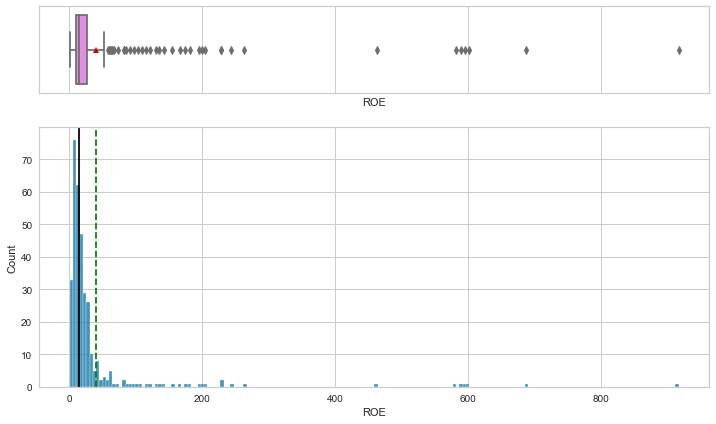

In [16]:
histogram_boxplot(df, 'ROE')  # Creating histogram_boxplot for 'ROE'

- This is a heavily right skewed distribution with lots of outliers at the right end
- Lots of the companies in the dataset were performing poorly at the lower end while some were seen to be performing much better at the higher end of the distribution

**`Cash Ratio`**

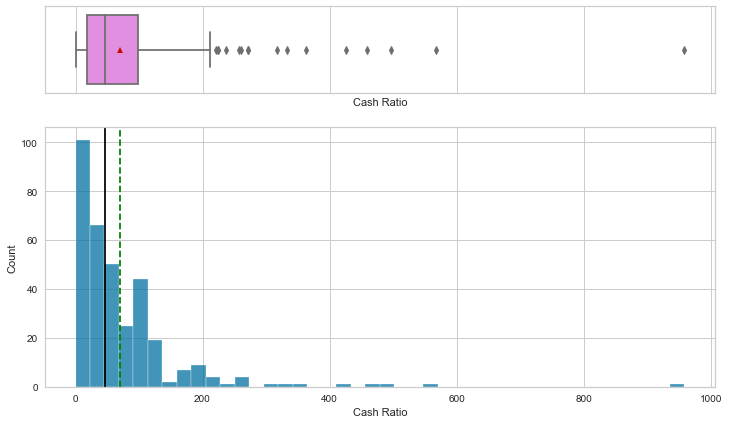

In [17]:
histogram_boxplot(df, 'Cash Ratio')  # Creating histogram_boxplot for 'Cash Ratio'

- This is a right skewed distribution with values ranging from 0 all the way to over 900.
- This distribution also corroborates the assertion that a lot of the companies are not performing very well as can be seen from the concentration of entries at the lower end while a few others are performing very well as seen on the upper end of the distribution

**`Net Cash Flow`**

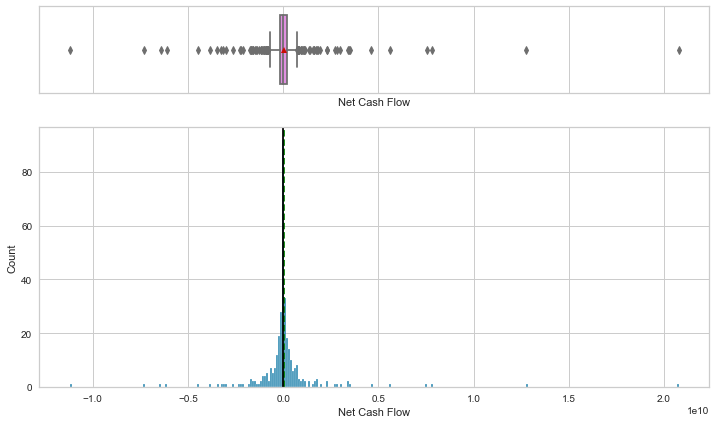

In [18]:
histogram_boxplot(df, 'Net Cash Flow')  # Creating histogram_boxplot for 'Net Cash Flow'

- This is a fairly normal distribution with values ranging from the negative end to the positive end in billions of dollars 
- There are outliers on both ends of the distribution

**`Net Income`**

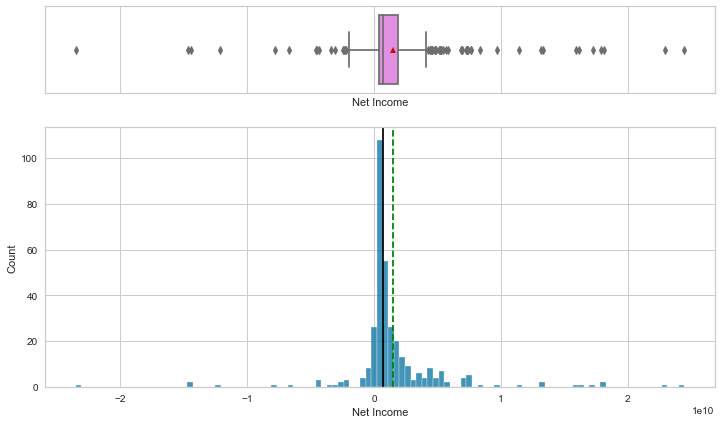

In [19]:
histogram_boxplot(df, 'Net Income')  # Creating histogram_boxplot for 'Net Income'

This is a slightly right skewed distribution with similar properties as the Net Cash Flow distribution

**`Earnings Per Share`**

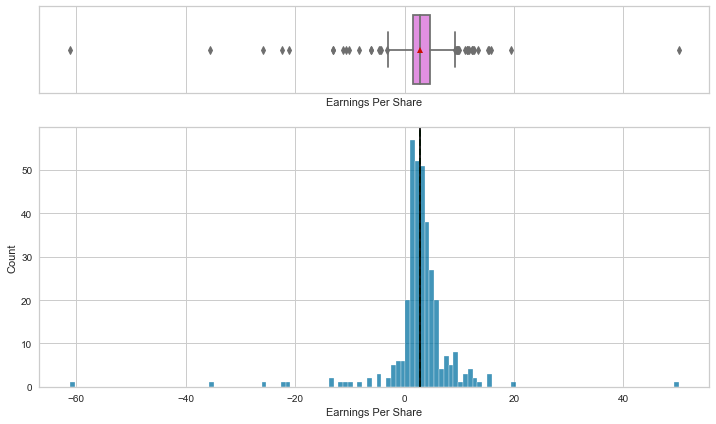

In [20]:
histogram_boxplot(df, 'Earnings Per Share')  # Creating histogram_boxplot for 'Earnings Per Share'

A slightly left skewed distribution with outliers on both ends of the distribution

**`Estimated Shares Outstanding`**

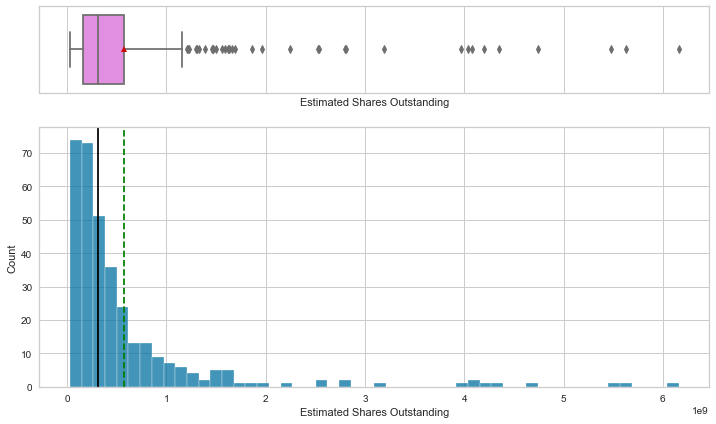

In [21]:
histogram_boxplot(df, 'Estimated Shares Outstanding')  # Creating histogram_boxplot for 'Estimated Shares Outstanding'

This is a heavily right skewed distribution with lots of outliers at the upper end 

**`P/E Ratio`**

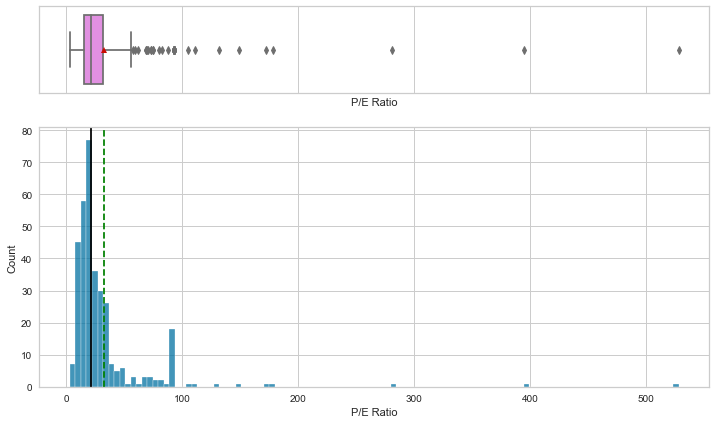

In [22]:
histogram_boxplot(df, 'P/E Ratio')  # Creating histogram_boxplot for 'P/E Ratio'

- This is a right skewed distribution ranging from <5 to over 500
- The distribution has lots of outliers to the right 

**`P/B Ratio`**

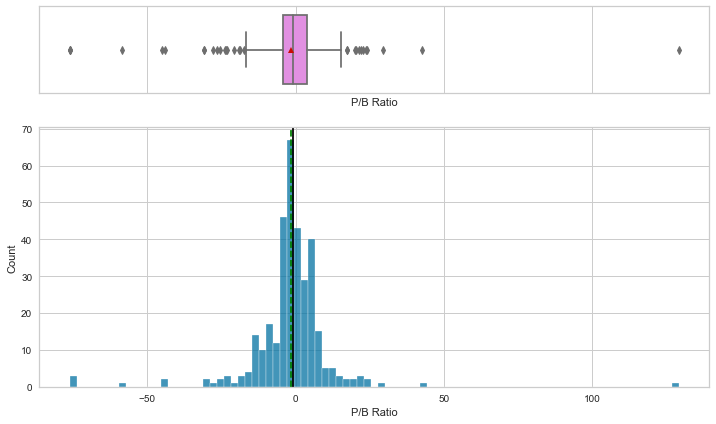

In [23]:
histogram_boxplot(df, 'P/B Ratio')  # Creating histogram_boxplot for 'P/B Ratio'

- This is a fairly normal distribution with outliers to the left and right of the distribution
- The mean and median are also very close to each other

In [24]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

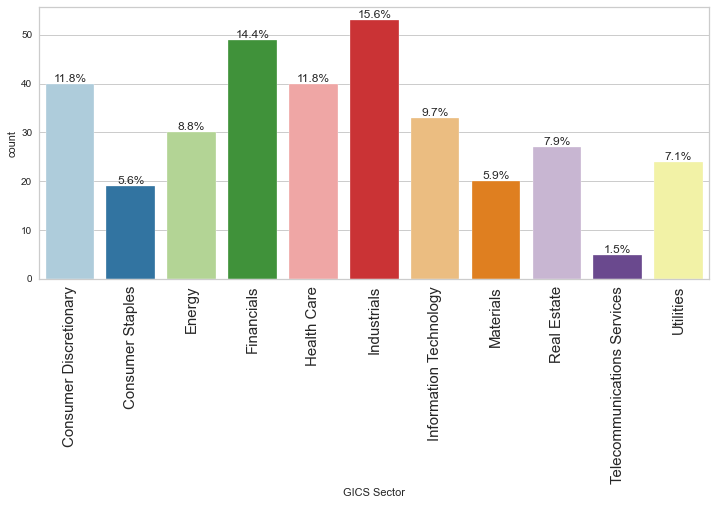

In [25]:
labeled_barplot(df, 'GICS Sector', perc=True) # Creating a labelled barplot for 'GICS Sector'

- The Indistries GICS Sector has the highest representation of companies in the dataset at 15.6%
- This is followed by the Financials sector at 14.4% , and the Consumer Discretionary and Health care tie at 11.8% and then followed by the Information Technology sector and so on
- The least represented sector is the Telecommunication Services at 1.5% representative 

**`GICS Sub Industry`**

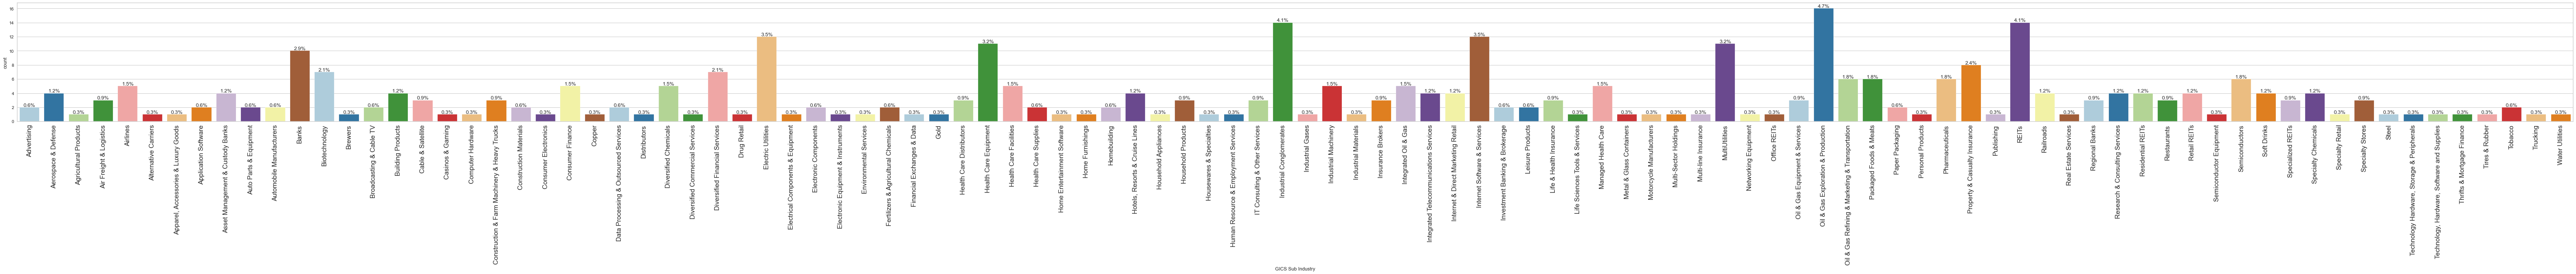

In [26]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)  # Creating a labelled barplot for 'GICS Sub Industry'

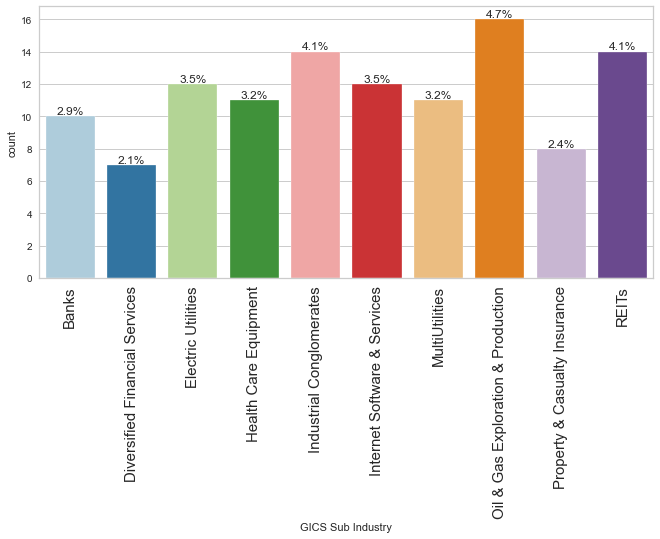

In [27]:
labeled_barplot(df, 'GICS Sub Industry', perc=True, n=10)

- The top Sub Industry groups are Oil & Gas Exploration & Production representing 4.7% of the data, followed by Industrial Conglomerates and REITs both at 4.1% each, followed by Electric Utilities and Internet Software & Services both at 3.5% each and so on

In [28]:
df['GICS Sub Industry'].value_counts(normalize=True)

Oil & Gas Exploration & Production                 0.047059
REITs                                              0.041176
Industrial Conglomerates                           0.041176
Electric Utilities                                 0.035294
Internet Software & Services                       0.035294
Health Care Equipment                              0.032353
MultiUtilities                                     0.032353
Banks                                              0.029412
Property & Casualty Insurance                      0.023529
Diversified Financial Services                     0.020588
Biotechnology                                      0.020588
Pharmaceuticals                                    0.017647
Packaged Foods & Meats                             0.017647
Oil & Gas Refining & Marketing & Transportation    0.017647
Semiconductors                                     0.017647
Diversified Chemicals                              0.014706
Consumer Finance                        

### Bivariate Analysis

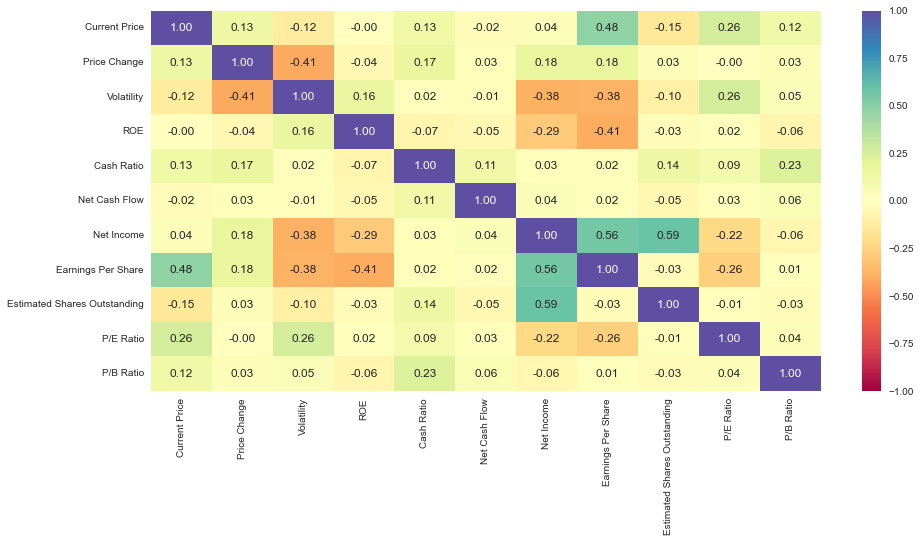

In [29]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There are no strong high correlations amongst the variables
- There is medium positive correlation between Earnings Per Share with Current Price and Net Income
- There is also a medium positive correlation between Estimated Shares Outstanding and Net Income
- There a medium negative correlation between Price Change and Validity, and between ROE and Earnings Per Share
- The rest of the variables show low to no correlation

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

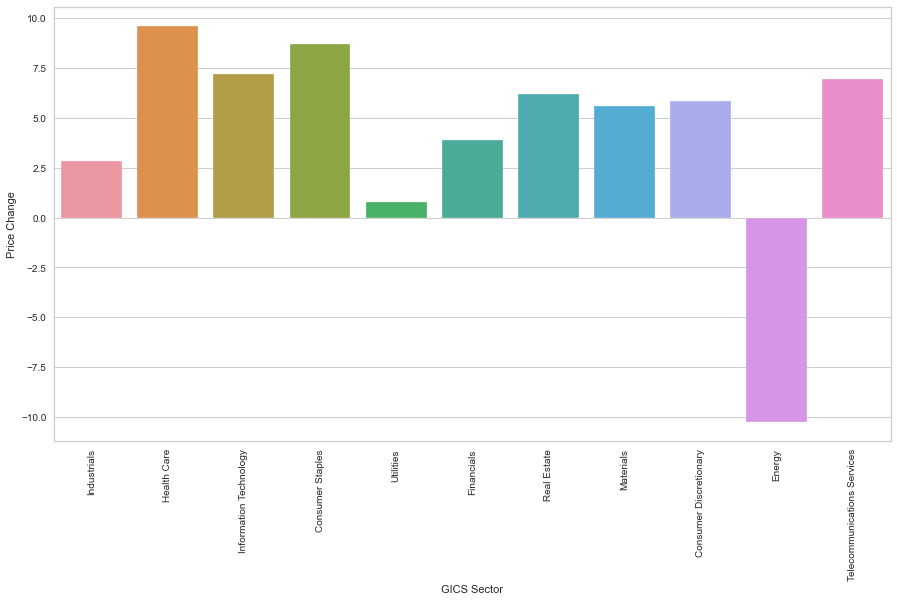

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  
plt.xticks(rotation=90)
plt.show()

- The health care sector has seen the highest stock price increase on the average in the 13 week period of data collection.
- The next sector with higher price increase is the Consumer Staples followed by Information Technology and then Telecommunications Services. 
- The sector with the most price decrease over the period is the Energy sector

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

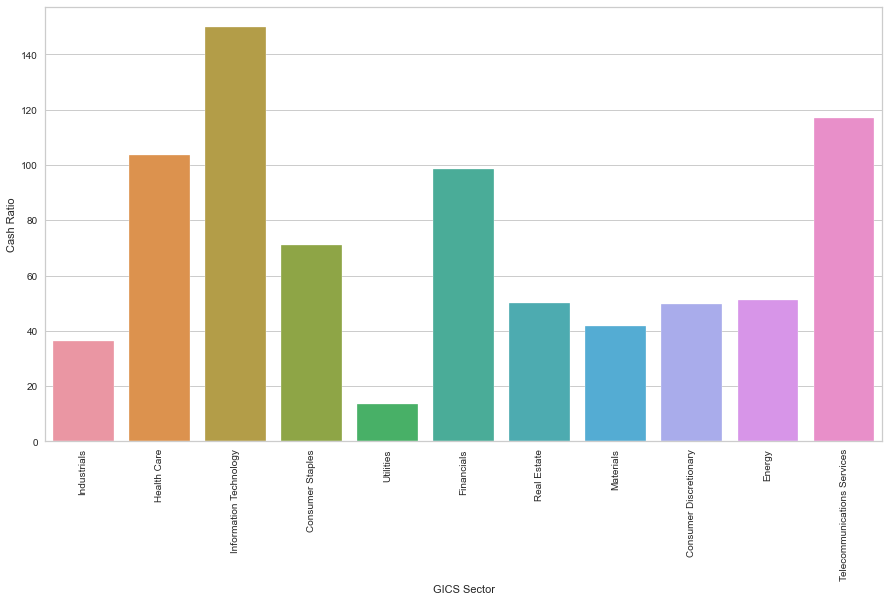

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  
plt.xticks(rotation=90)
plt.show()

Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.
- The Sector with the highest Cash Ratio is the Information Technology sector, followed by the Telecommunications Services and then the Health Care, and then Financils Sectors
- Thesector with the least Cash Ratio is the Utilities sector

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

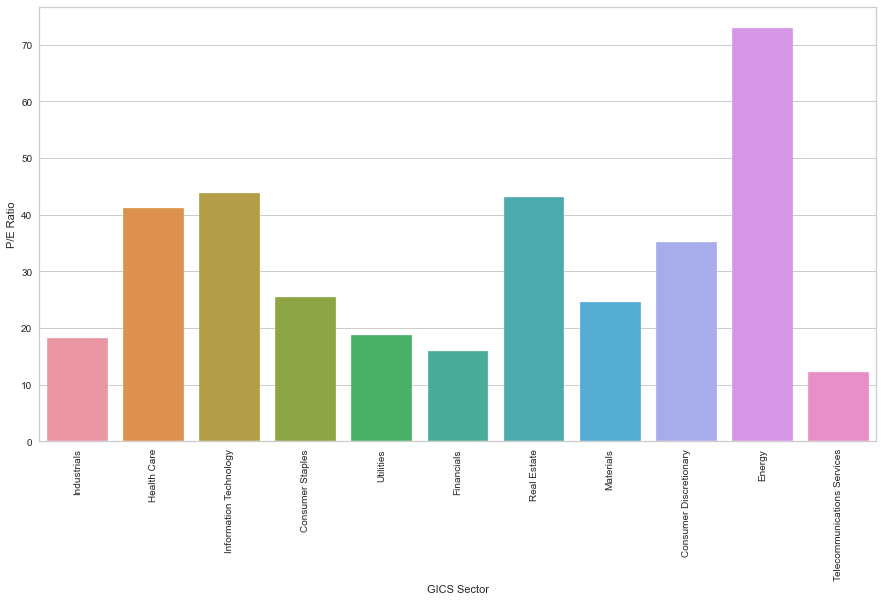

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  
plt.xticks(rotation=90)
plt.show()

P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.
- The Energy Sector has the highest P/E Ratio on the average. This is followedby the Information Technology sector and closely followed by the Real Estate and Health Care sectors
- The Telecommunications Services sector has the least P/E Ratio on the average.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

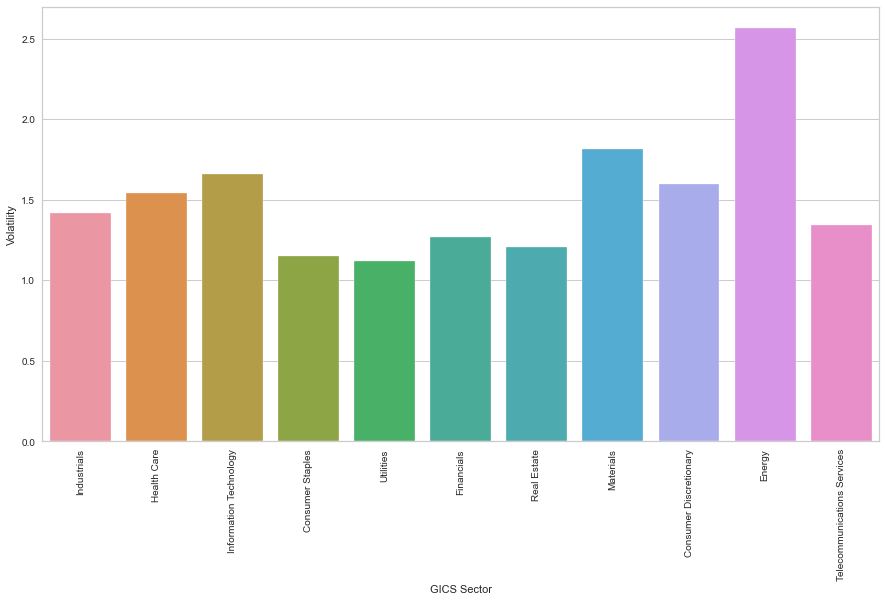

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  
plt.xticks(rotation=90)
plt.show()

Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.
- The Energy sector has the highest volatility. This supports the deep price decrease that was noticed in the sector in erlier analysis
- The next highest volatile sector is the Materials sector, followed by the Information Technology and Consumer Discretionary sectors
- The sector with the least volatility is Utilities, closely followed by Consumer Staples


### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

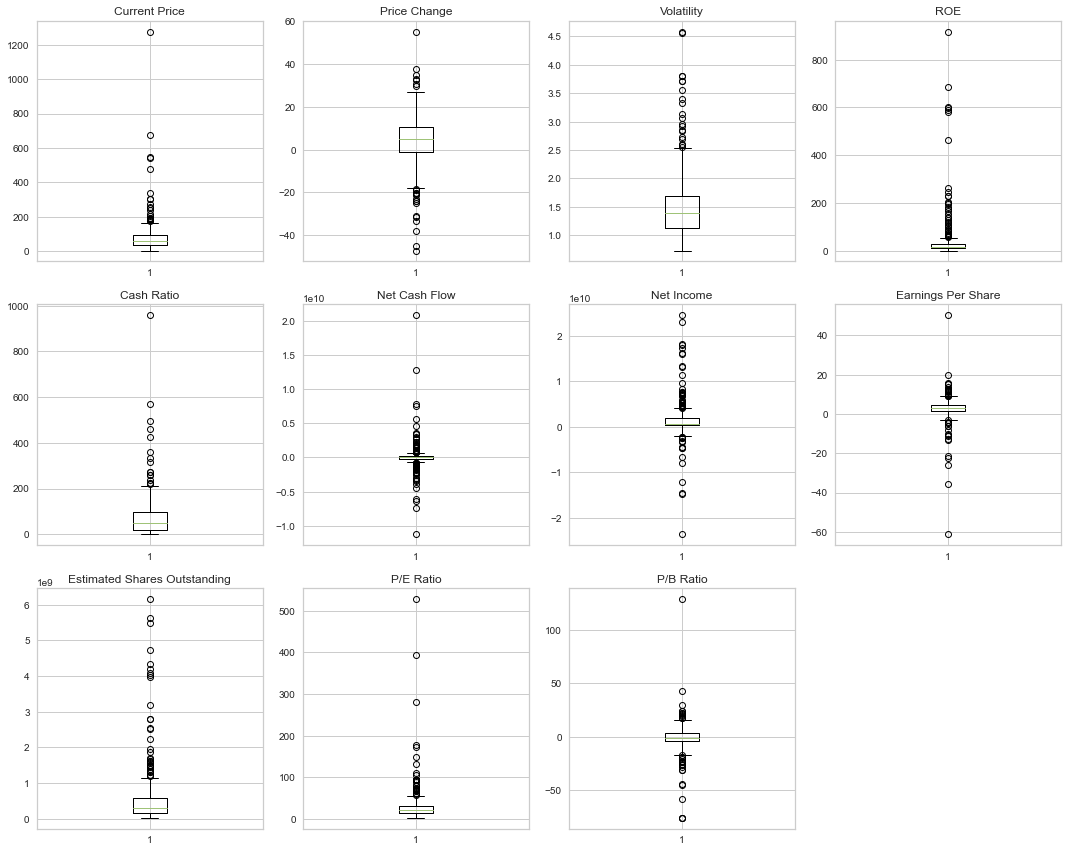

In [34]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All the numerical variables have outliers. Majority of the variables have the outliers on both the upper and lower ends while Current Price, ROE, Cash Ratio and P/E Ratio have outliers only at the upper end of the distributions.
- All the values appear as real and possibly represent true values.
- Different companies have different varrying stock prices depending on different factors such as their financial performances and position, industry of operations, and other factors
- The Cash Flow and Income generation also varies across several companies and so are financial metrics.
- Hence, we will therefore not be treating the outliers in this data as they represent true, possible and proper values.

### Scaling

- Let's scale the data before we proceed with clustering.

In [35]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [36]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[num_col].copy()  
subset_scaled = scaler.fit_transform(subset)

In [37]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [38]:
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [39]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


In [40]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


## K-means Clustering

In [41]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


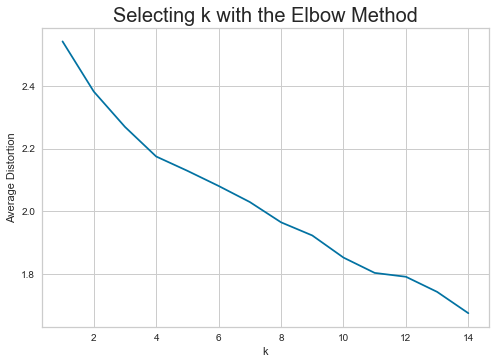

In [42]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()


- The built elbow is not really a “perfect elbow” and it is difficult to visualize where the elbow nick is located.
- We will however go with a value of k which seems to be between 4 and 8.  Appropriate value of k seems to be 4, 5 or 6


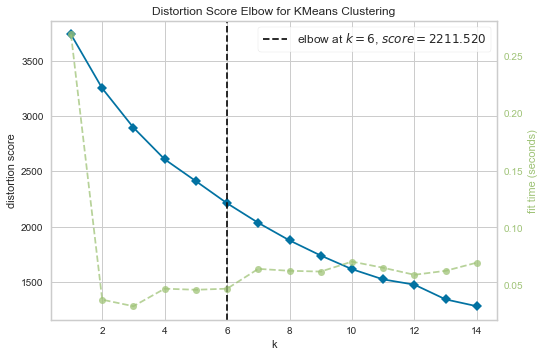

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


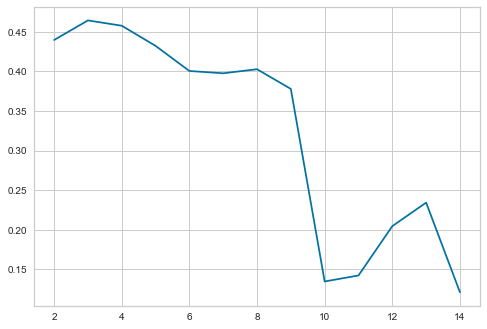

In [44]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

From the silhouette score, the best (highest) score is 3
- However, 3 clusters for 340 data points might not be a good cluster judgement
- Hence, we will get cluster profiles of k = 3 all the way to k=10 and visualize the best cluster profile using the silhouette visualiser 


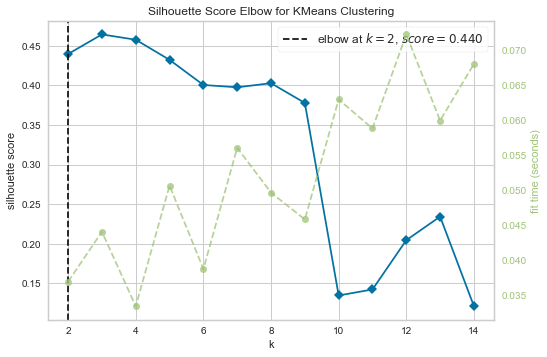

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [45]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

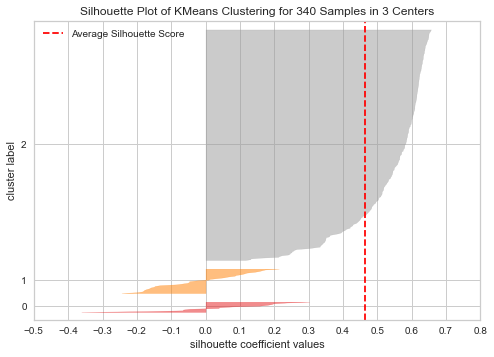

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

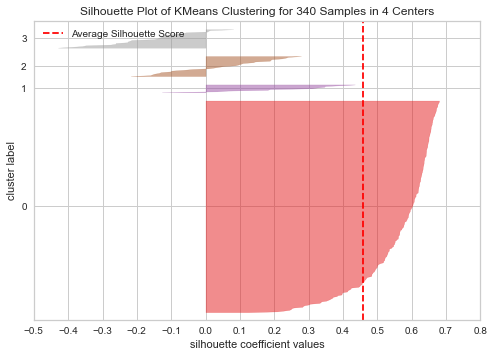

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

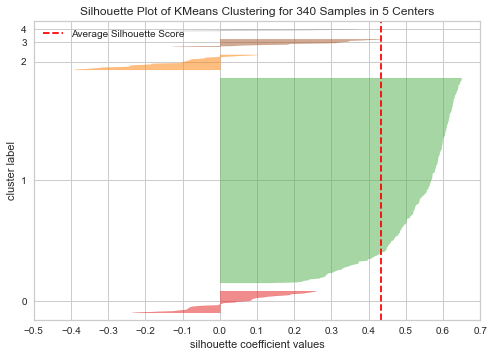

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

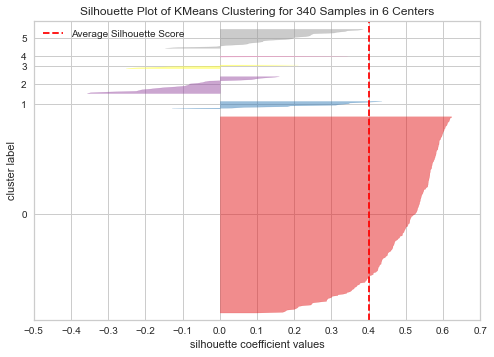

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

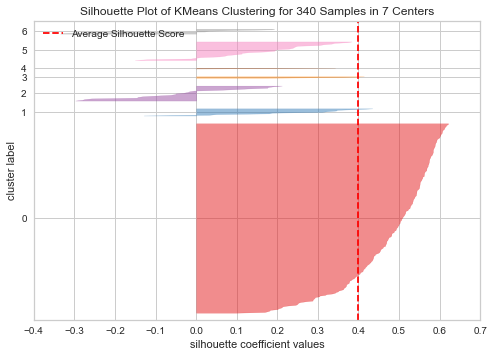

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

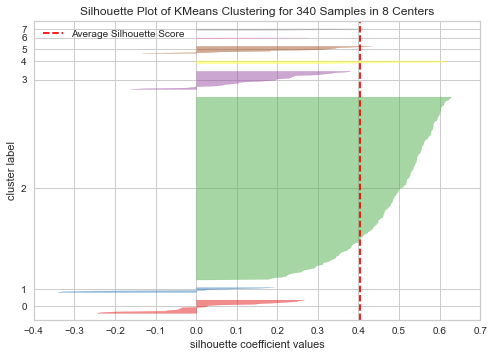

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

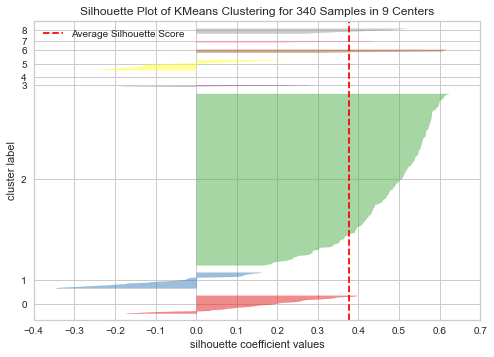

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

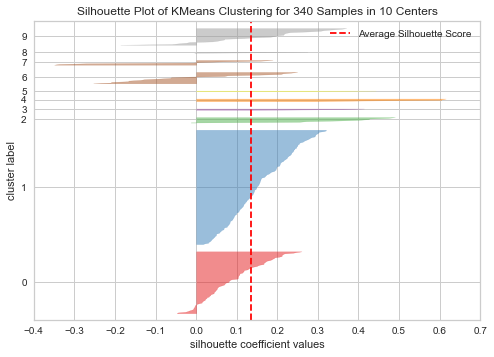

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

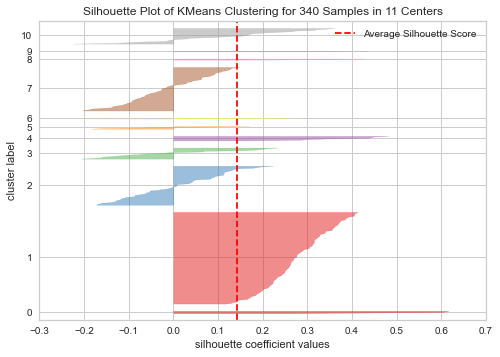

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(11, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

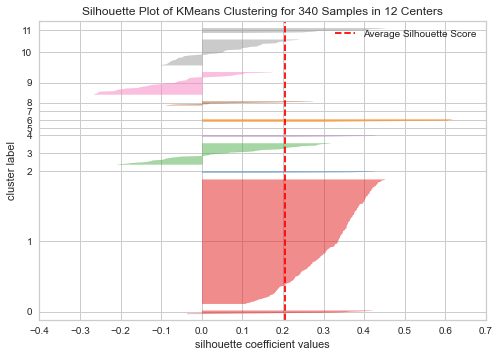

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(12, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

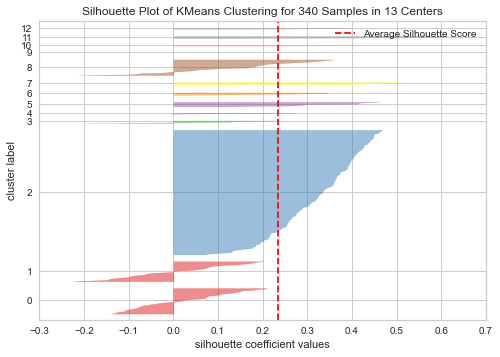

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(13, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

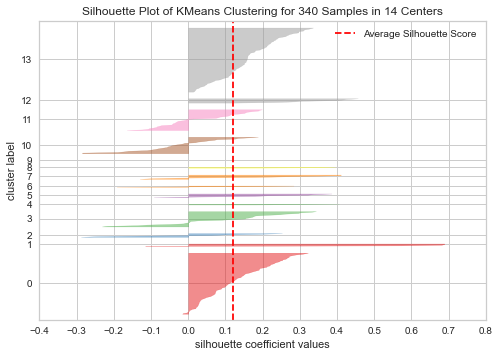

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
#finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(14, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

### Observations
- Most of the clusters have mis-classification where points are appearing in the zero to negative region
- Most of the profiles also have bulk of the data in one cluster while a few are clustered in the remaining clusters
- Most of the profiles also have clusters that re below the average silhouette score
- We will be going with k =9 as it provides the best average score profile with the most number of clusters above the average score and a fair number of mis-classified data in the zero to negative region. 

Let's take 9 as the appropriate no. of clusters as the silhouette score is high enough and there is nick at around 8 and 9 in the elbow curve.

In [58]:
# final K-means model
kmeans = KMeans(n_clusters=9, random_state=1)  
kmeans.fit(k_means_df)

KMeans(n_clusters=9, random_state=1)

In [59]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiles

In [60]:
km_cluster_profile = df1.groupby("KM_segments").mean()  # Groupingby the cluster labels

In [61]:
km_cluster_profile["count_in_each_segment"] = (df1.groupby("KM_segments")["Security"].count().values)

In [62]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,34.558104,-15.284918,2.811494,41.037037,46.074074,-222747814.814815,-1884359259.259259,-4.857778,496264493.701482,72.688430,1.575281,27
1,162.710972,12.513141,1.814490,25.916667,291.375000,45246250.000000,875603458.333333,4.210833,606112438.106250,45.063231,15.624694,24
2,71.926700,5.141277,1.376998,25.071146,50.513834,-63178118.577075,1327588067.193676,3.623439,402120917.453399,23.544967,-3.316284,253
3,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,73.324375,4.604377,1.209719,31.875000,93.875000,4587600000.000000,7601768750.000000,5.467187,1565096943.725000,21.062418,-0.253326,16
6,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
7,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
8,50.744999,5.512605,1.070356,24.875000,60.250000,-3860125000.000000,15782875000.000000,3.632500,4640082627.625000,16.598649,-7.787061,8


We can see from count that cluster 0 has 27 companies, cluster 1 with 24 companies, cluster 2 with 253 comapnies, and the remaining clusters have between 1 and 16 companies

In [63]:
# Print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.' 'Citizens Financ

In [64]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count() # Showing distribution of the GICS Sectors and number of companies in each sector, across the clusters

KM_segments  GICS Sector                
0            Energy                         20
             Industrials                     2
             Information Technology          2
             Materials                       3
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     8
             Information Technology          9
             Materials                       1
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary         31
             Consumer Staples               13
             Energy                          5
             Financials                     42
             Health Care                    27
             Industrials                    49
             Information Technology         19
             Materials                      16
             Real Estate                    26
             Teleco

Count of clusters by GICS Sector

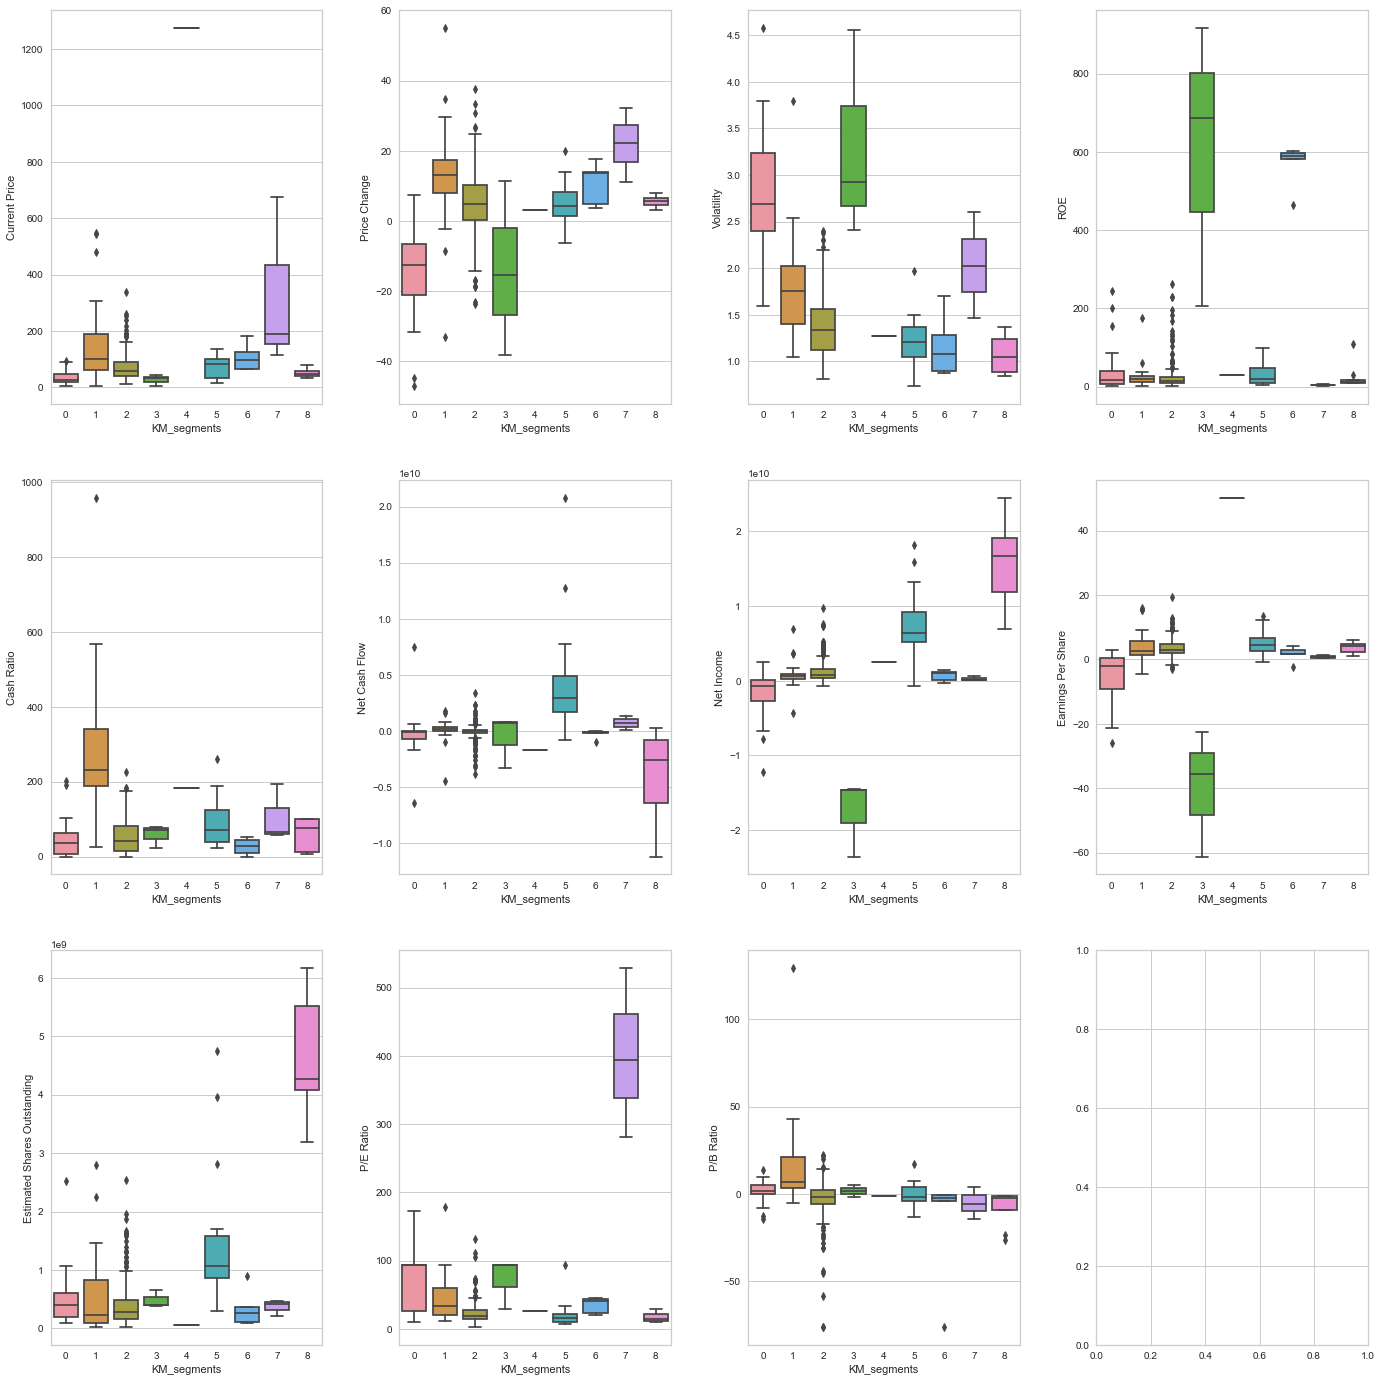

In [65]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

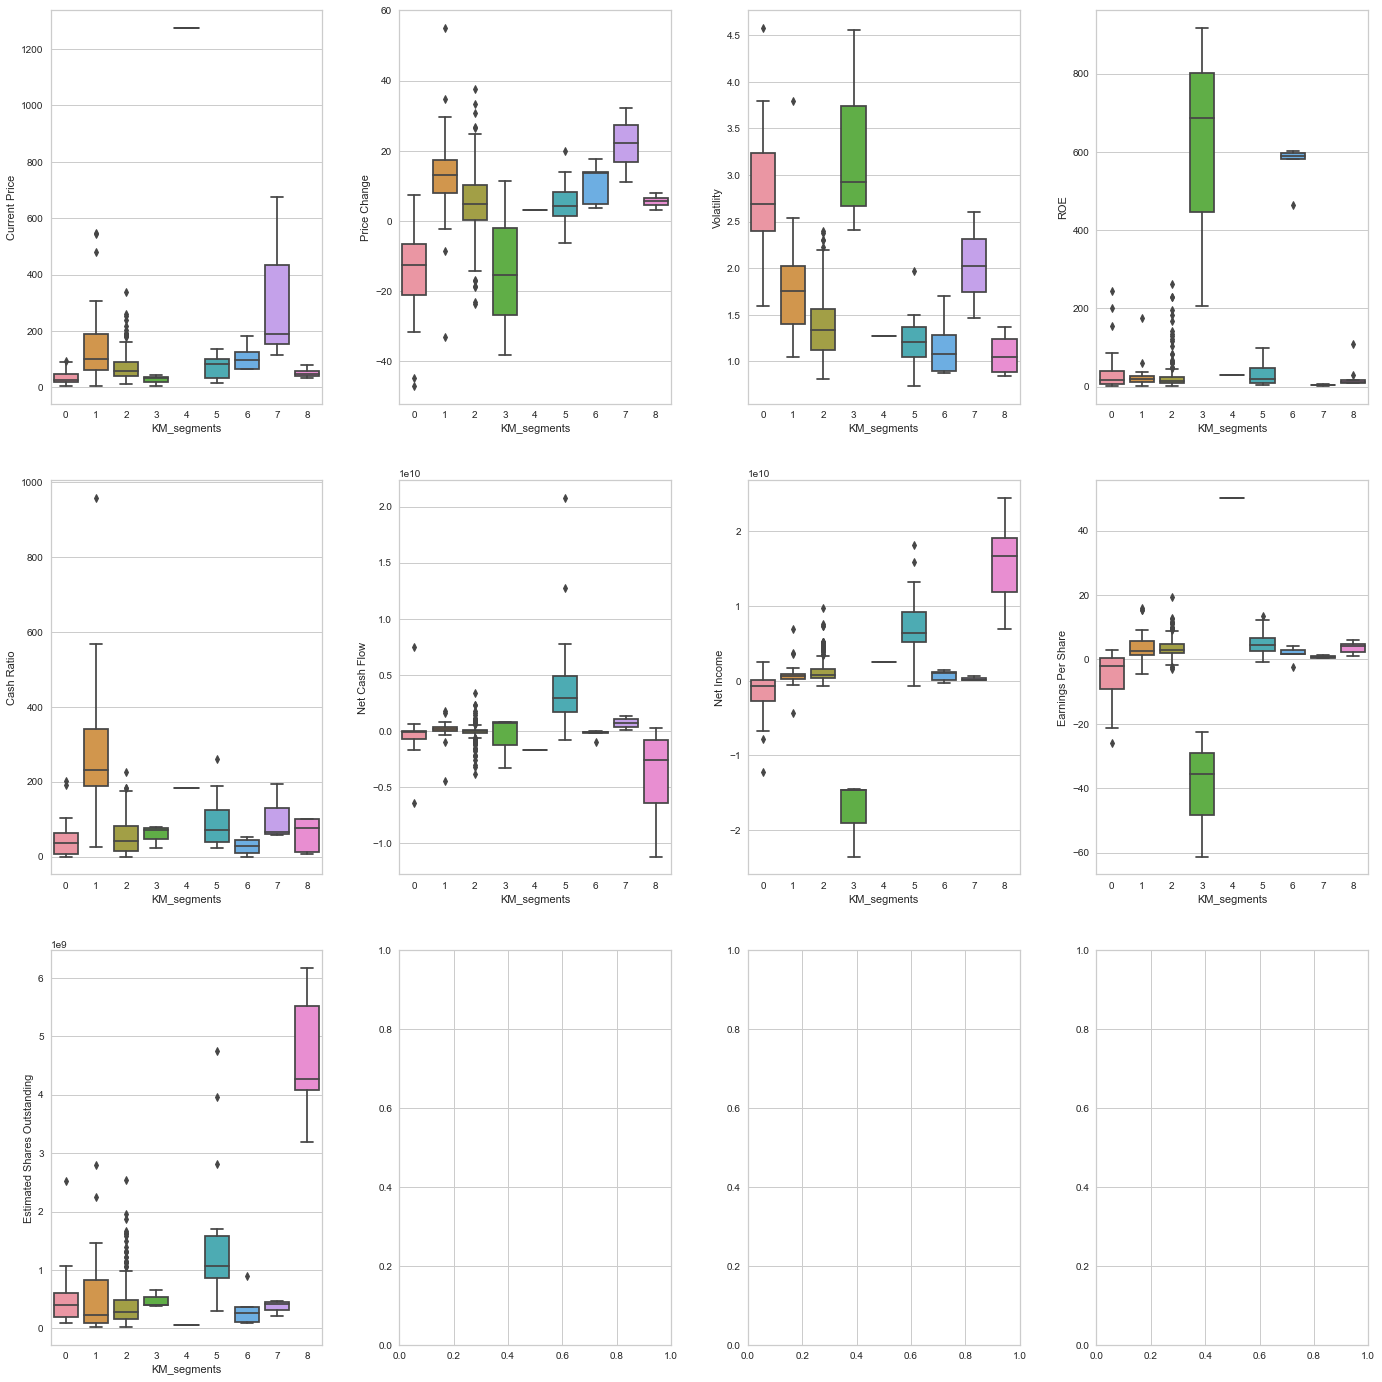

In [66]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 9:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

<AxesSubplot:xlabel='KM_segments'>

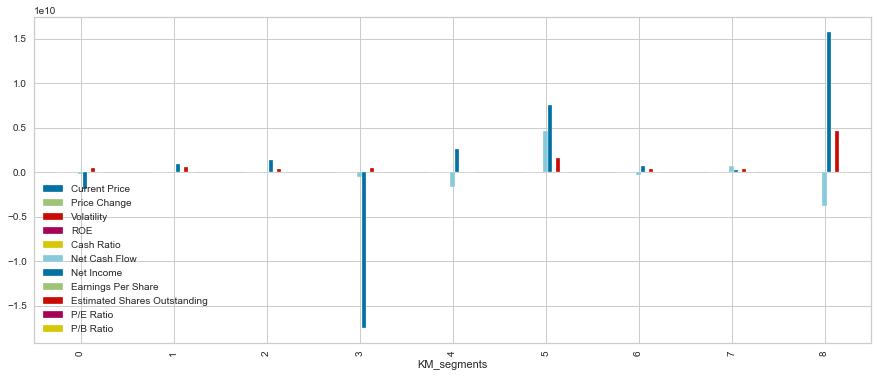

In [67]:
df1.groupby("KM_segments").mean().plot.bar(figsize=(15, 6)) #Cluster profiling

**Cluster 0**
- There are 27 companies in this cluster
- Stock price is low and has been decreasing (actually the deepest decrease in the dataset) in the 13-week period
- The stocks have very high volatility
- ROE and Cash Ratio with negative Net Cash Flow and negative Net Income are low
- Earnings per Share, Estimated Shares Outstanding, and P/B Ratio are all low
- Generally, the financial performance and position of the companies in this cluster are quite poor


**Cluster 1**
- There are 24 companies in this cluster
- This cluster has high stock price, high price change increases, low volatility
- They have the highest Cash and P/B Ratios. They also have very high Net Cash Flow and Net Income too


**Cluster 2**
- This cluster has the highest number of companies, 253 in the dataset
- They have a high stock price, with low price change and low volatility
- Average cash ratio and low ROE. Net Income is high but with low earnings per share

**Cluster 5**
- With 16 companies, they have a high stock price and low price change and volatility
- Net cash flow is highest in this cluster and they have very high net income too
- Estimated shares outstanding is average compared to other clusters with average P/E ratio

**Other Cluster Insights**
- Cluster 3 has very low stock price (the lowest in the dataset) but very steady decrease in the price change. The stocks here have the highest price volatility and highest ROE.
- Cluster 4 has the highest stock prices with low price change and very low volatility. The stocks here provide the highest earning per share and a very high net income.
- Cluster 6 has high stock prices, high price change, low volatility and high net income
- Cluster 7 has high stock price, very high price change and high volatility, with the highest P/E ratio
- Cluster 8 has average stock price, average price change, highest net income and highest outstanding shares

Clusters 1, 4, 5 and 6 seem to be generally the best performers in terms of investment opportunities; Cluster 2 stocks is for an average or risk averse investor while cluster 3 seems to be the overall worst cluster of securities for stocks investment followed by cluster 7.


# Hierarchical Clustering

In [68]:
hc_df = subset_scaled_df.copy()

In [69]:
from scipy.cluster.hierarchy import linkage

In [70]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] # Code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] # Code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [71]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] # Code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage

We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

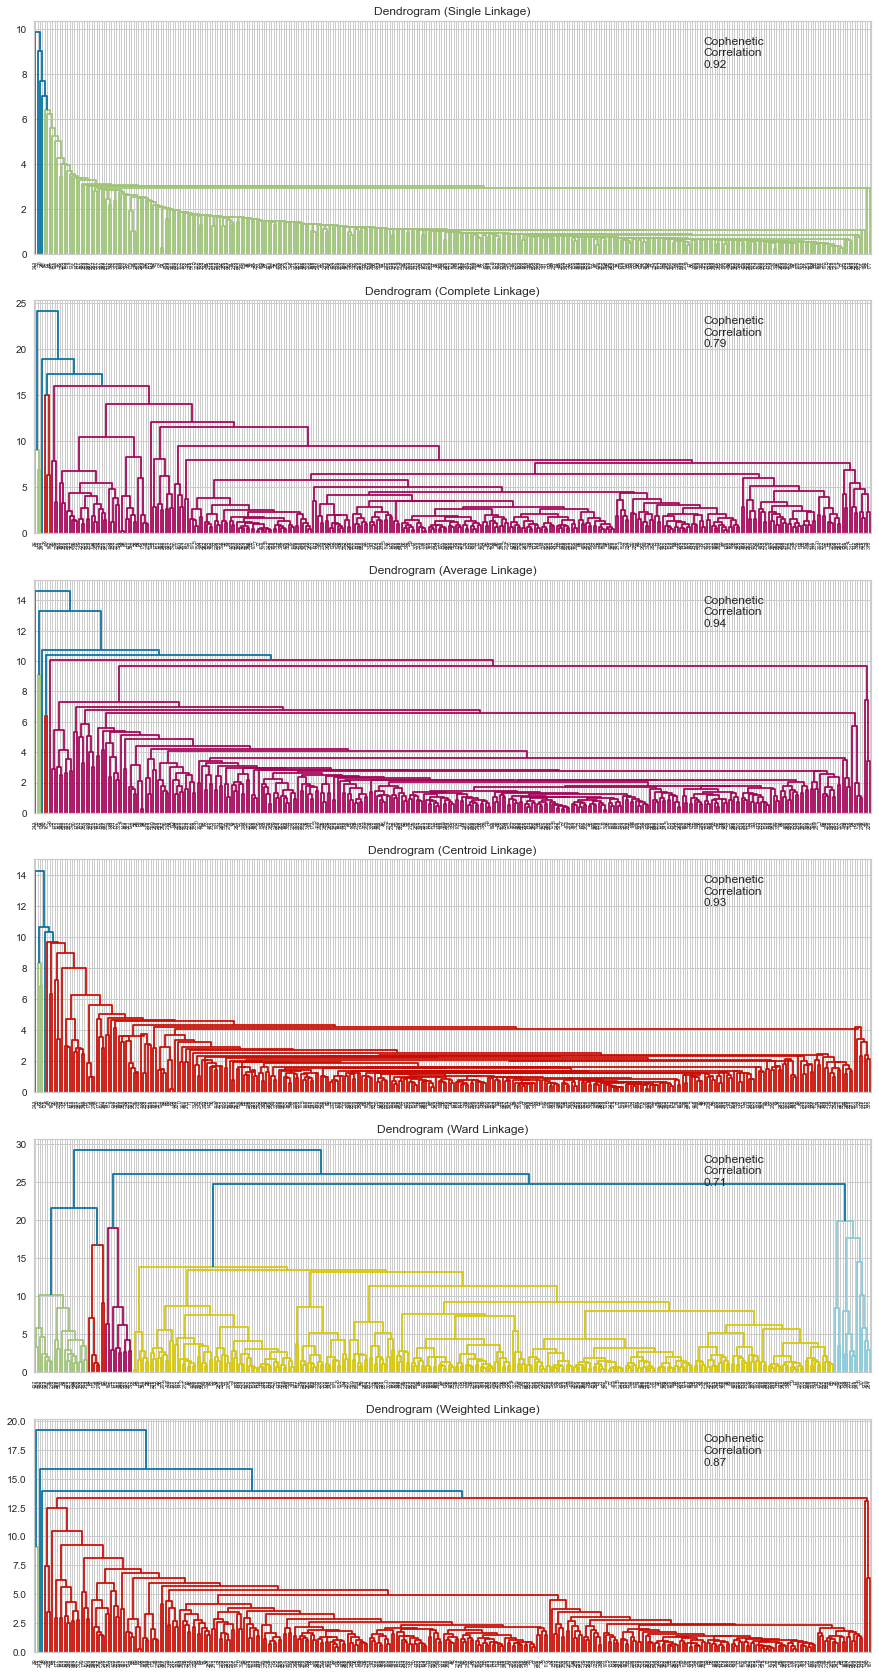

In [72]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] # Code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

- The cophenetic correlation is highest for average the linkage method at 0.94, while the centroid linkage comes closely next at 0.93.
- We will move ahead with average linkage.
- 7 appears to be the appropriate number of clusters from the dendrogram for average linkage cutting off at 8 mark .
- Final hc model with n-clusters = 7
- The ward linkage dendrogram has very well seperated and defined clusters. Cutting off at the 15 mark height on the y axes also gives us 7 clusters.

In [73]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


In [74]:
HCmodel = AgglomerativeClustering(n_clusters= 7, affinity="euclidean", linkage="average")  # Defining the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [75]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [76]:
hc_cluster_profile = df2.groupby("HC_segments").mean()  # Groupingby the cluster labels

In [77]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  # Groupingby the cluster labels
)

In [78]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,75.017416,3.937751,1.513415,35.621212,66.545455,-39846757.575758,1549443100.000000,2.904682,562266326.402576,29.091275,-2.146308,330


In [79]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 6, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scient

We see that there are 3 clusters of one company each, 2 cluster2 of two companies, 1 cluster of 3 companies, and all the other companies are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.

- Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 
- 7 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

## Cluster Profiling using ward linkage

In [80]:
HCmodel = AgglomerativeClustering(n_clusters= 7, affinity="euclidean", linkage="ward")  # Defining the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=7)

In [81]:
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [82]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [83]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  # Groupingby the cluster labels
)

In [84]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,563.992491,17.235667,1.839399,10.250000,125.500000,105834000.000000,853500250.000000,13.085000,287806305.492500,307.105187,-4.254889,4
1,73.062443,4.673490,1.399188,34.878571,54.507143,66523982.142857,1556658764.285714,3.689625,443300430.283964,24.379506,-3.214885,280
2,164.654920,15.257627,1.812092,25.571429,296.333333,317861428.571429,744014523.809524,3.850476,566226247.226190,41.057292,17.410120,21
3,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2


In [85]:
# Code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'AMETEK Inc' 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle Internation


- Now the clusters seem to have more variability with a better spread of data amongst clusters
- We can also see the distribution of the GICS Sector across the clusters


In [86]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          2
             Health Care                     1
             Information Technology          1
1            Consumer Discretionary         34
             Consumer Staples               17
             Energy                          7
             Financials                     45
             Health Care                    31
             Industrials                    53
             Information Technology         23
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
2            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     7
             Information Technology          7
             Materials                       1
             Real Estate                     1
             Teleco

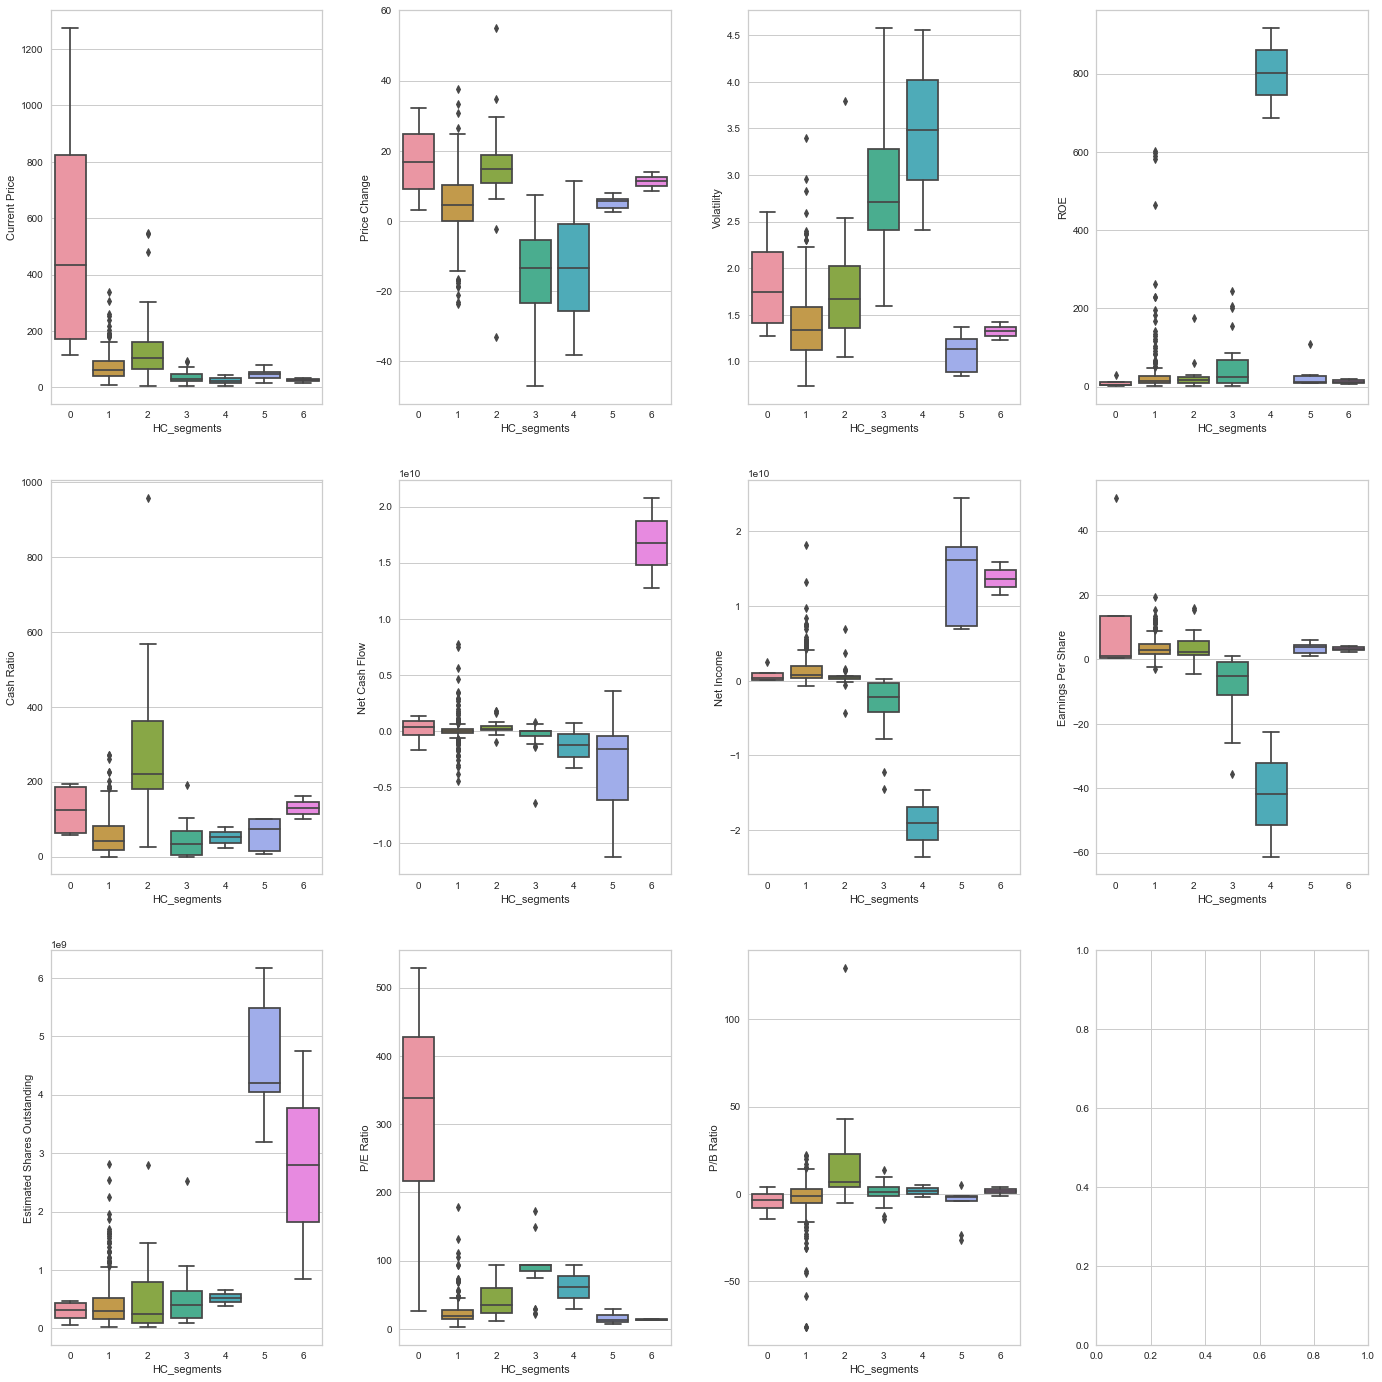

In [87]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

<AxesSubplot:xlabel='HC_segments'>

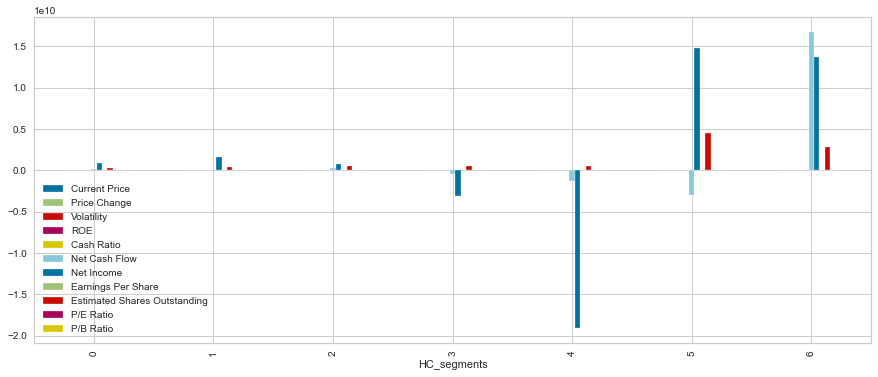

In [88]:
df2.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

**Cluster 0**
- There are 4 companies in this cluster
- Stock price is very high (highest in the dataset), Percentage price increase has been very high (also highest in the dataset) 
- The stocks have low to average volatility
- Low ROE, average, average Net Cash Flow and Net Income
- Very high Earnings per Share and very high P/E Ratio
- Generally, the financial performance and position of the companies in this cluster are very good

**Cluster 1**
- There are 280 companies in this cluster
- Stock price is low, average price change increase with low volatility
- They have a low Cash Flow, low Net Cash Flow and average Net Income

**Cluster 2**
- There are 21 companies in this cluster
- The companies have moderate stock prices, had a very high price change increases, low to average volatility, very high cash ratio, low to moderate Net Cash Flow and Net Income
- Low Estimated Shares Outstanding

**Cluster 3**
- There are 22 companies in this cluster
- The companies low stock prices, had a very high price change decreases (deepest dive in price change decrease in the dataset), high volatility, low ROE
- Negative Net Cash Flow, Net Income and Earnings per share
- This cluster has companies with poor financial performance and indicators

**Cluster 4**
- There are 2 companies in this cluster
- This cluster has very similar properties with cluster 3
- Has the highest stock price volatility as well as highest ROE

**Cluster 5**
- There are 9 companies in this cluster
- Stock price is low, average price change increase with low volatility
- They have a low Cash Flow, negative Net Cash Flow, very high Net Income and very high Estimated Shares Outstanding

**Cluster 6**
- There are 2 companies in this cluster
- This cluster has low stock price, high price change increases, low volatility
- They have the highest Net Cash Flow in the dataset and a high Net Income too



### General insights
- The best performing stocks seem to be found in clusters 0 and 6 where we find good financial indicators such as steady stock price increases, low price volatility, high Earnings per Share, high Price to Earnings ratio, High to moderate Net Cash Flow and Net Income. Companies in these clusters are generally within the consumer discretionary, Healthcare, Information Technology and Financials Sectors
- Companies in cluster 1 have fairly moderate indicators and are recommended for risk averse investors, while
- Cluster 3 companies have shown general poor financial performance and indicators and should not be recommended to investors except the performance of the companies improve. Companies here are generally in the Energy Sector.


## K-means vs Hierarchical Clustering

- The K-means technique generally took less time to execute than the hierarchical clustering as the dendrograms in the hierarchical clustering technique took longer to execute
- The hierarchical technique gave more distinct clusters than the K-means, especially when the ward linkage method was used in hierarchical clustering. In the K-means, it was difficult to visualize and pin the elbow mark for appropriate number of clusters. 
- With the silhouette coefficient in K=means, the highest silhouette score of 3 did not give a good cluster profile in the visualizer and it seemed like the higher the number of clusters, the lower the average silhouette score and the higher the silhouette coefficient values in the cluster data
- In K-means 9 clusters were obtained as the final appropriate number of clusters while in Hierarchical clustering, 7 clusters were obtained as the final appropriate number of clusters
- In the K-means, the cluster with the best financial indicators for investment included companies in the GICS Sectors Consumer Discretionary, Consumer Staples, Healthcare, Information Technology, and Financials while in Hierarchical clustering, companies in the best performing clusters are generally within the Consumer Discretionary, Healthcare, Information Technology and Financials Sectors. The GICS Sector segments of good performers are quite similar for K-means and hierarchical clustering techniques.
- In the K-means, the cluster with the worst financial indicators for investment included companies in the GICS Sectors Energy, Industrials and Materials while in Hierarchical clustering, companies in the best performing clusters are generally within the Energy Sector. The GICS Sector segments of poor performers are quite similar for K-means and hierarchical clustering techniques.
- The results of K-means is a little bit unstructured, but that of Hierarchal is more interpretable and informative
- It is easier to determine the number of clusters by hierarchical clustering’s dendrogram than it is in the K-means clustering.



## Actionable Insights and Recommendations


- The negative values in price change represent percentage stock price decrease which might be because the market value is lower than the original purchase price of the stocks
- Cash Ratio in the dataset was generally which indicates that a lot of the companies are not performing very well as can be seen from the concentration of entries at the lower end while a few others are performing very well as seen on the upper end of the distribution
- Companies with the negative Cash Flows may be losing money or a reflection of poor timing of income and expenses e.g bills might be due before customers pay their invoices to the companies.
- The companies with negative Net Income might be in a growth stage and heavily reinvesting or have money-losing operations and might have to write-down a loss in their books.
- Earnings per share can be negative when a company's income is negative, which means that the company is losing money, or spending more than it is earning. 
- The lower the P/B ratio of the companies, the more undervalued the company is. But if the company's book value is negative it will make the price to book value negative. However, the lower the P/B is, the better. That’s because an investor is paying less for more book value.


   - In order to help investors better analyze stocks across different market segments and help protect against risks that could make their portfolio vulnerable to losses, the following investment portfolios can be considered for client investors:
        - For high-risk takers that seek aggressive growth and returns in their investment, they should consider investing in Health care, Information Technology, and Consumer Discretionary sectors This is because securities in these industries exhibit very high return on shareholders’ equity, high earnings per share, high price to earning ratio and high price volatility
        - For moderate risk takers, investment in the securities from the following sectors should be considered; Consumer Discretionary, Consumer Staples, Industrials and Financials Sectors. Financial indicators in clusters that have majorly these sectors indicate low to medium risk of portfolio vulnerability to losses.
        - While sectors with really poor financial performance metrics for investments include Energy and Materials GICS Sectors of the economy.


### Executive Summary and Insights

- The Industrials GICS Sector has the highest representation of companies in the dataset at 15.6% while the least represented sector is the Telecommunication Services at 1.5% representative
- The sector with the most price decrease over the period is the Energy sector while the health care sector has seen the highest stock price increase on the average in the 13-week period of data collection.
- In the K-means, the cluster with the best financial indicators for investment included companies in the GICS Sectors Consumer Discretionary, Consumer Staples, Healthcare, Information Technology, and Financials while in Hierarchical clustering, companies in the best performing clusters are generally within the Consumer Discretionary, Healthcare, Information Technology and Financials Sectors. The GICS Sector segments of good performers are quite similar for K-means and hierarchical clustering techniques.
- In the K-means, the cluster with the worst financial indicators for investment included companies in the GICS Sectors Energy, Industrials and Materials while in Hierarchical clustering, companies in the best performing clusters are generally within the Energy Sector. The GICS Sector segments of poor performers are quite similar for K-means and hierarchical clustering techniques.


###### Other insights

- Earnings per share can be negative when a company's income is negative, which means that the company is losing money, or spending more than it is earning. A negative EPS does not necessarily mean that a stock is a sell.
- Sometimes, negative cash flow means that your business is losing money. Other times, negative cash flow reflects poor timing of income and expenses. You can make a net profit and have negative cash flow. For example, your bills might be due before a customer pays an invoice
- In the most general of terms, negative net income tends to happen in three situations: A company is in a growth stage and heavily reinvesting. A company has money losing operations. A company has to write-down a loss on its books
- In economics, negative pricing can occur when demand for a product drops or supply increases to an extent that owners or suppliers are prepared to pay others to accept it, in effect setting the price to a negative number.
- It is possible for a stock to have a negative price-to-earnings ratio (P/E). A high P/E typically means a stock's price is high relative to earnings while a low P/E indicates a stock's price is low compared to earnings. The P/E is calculated by dividing the current price by the current earnings per share or EPS.
- A low P/B ratio could also mean the company is earning a very poor (even negative) return on its assets (ROA). negative book value. If you use the price to book ratio, the lower the ratio the more undervalued the company is. But if the company's book value is negative it will make the price to book value negative.

Best Stocks have high EPS, high P/E ratio, low P/B ratio